# Chapter 5

## Question 8

In which we do cross-validation on a simulated data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

### (a) Generate a simulated data set.

In [2]:
x = np.random.normal(size=100)
y = x-2*np.square(x) +  np.random.normal(size=100)

In [3]:
x

array([-1.51647564, -0.69759149, -0.51802386, -1.07929782, -1.58730809,
        0.3325702 ,  0.04017013, -0.74740489,  0.08284311,  0.36629287,
        0.77391468,  1.63013442,  0.4356691 ,  1.16932915, -0.84158512,
       -1.02401257,  0.07275481, -0.59785956,  1.12116431,  0.77996272,
        0.37643653,  0.67501743,  0.58206728,  1.00460009, -1.7139656 ,
        0.22837534,  0.92127232,  0.31388982, -0.38810126,  1.21935947,
       -1.09910615,  0.40983402, -1.85129395,  1.11935023, -0.54957713,
        0.96882271,  1.13251404, -0.78009039,  0.09801761,  0.99699984,
       -0.07726439,  0.9379755 , -0.98764999, -0.51602623,  1.53978308,
       -0.28060124,  1.85990741,  0.32939427,  0.53285879,  0.49921596,
        1.0790112 , -0.49059986,  0.59396771,  0.53539832,  0.15177723,
       -0.87197115,  1.49960635,  0.20609879, -0.17558516, -0.28704755,
       -1.37613133,  0.76110939,  0.39194045, -1.00571827, -0.11294694,
        1.11918653, -0.56932468,  0.33530151, -0.5286026 , -0.97

In [4]:
y

array([-6.88944493,  0.40079633, -0.8370334 , -2.78732966, -4.71190038,
       -0.10996061, -0.2012049 , -2.29045122,  0.14614058, -1.59203541,
       -2.32210125, -3.05591493,  1.13571198, -2.44087463, -2.94381981,
       -2.46701691, -0.59433358, -3.40766027, -1.14445906,  0.23223204,
       -0.07342642,  1.26275618,  1.26759275, -1.6697232 , -6.45477531,
       -1.17622222, -1.65980287,  1.3338611 , -0.13249449, -0.82212803,
       -4.47218757,  1.84022118, -9.27055982, -1.90033741, -1.97383738,
       -2.30905211,  0.20910048, -1.73288918, -0.59930792, -0.97642197,
       -1.73804561, -2.31627933, -4.77207973, -1.73901898, -3.1486522 ,
       -1.33714782, -6.2632611 , -0.7811172 ,  0.68747588,  1.45006133,
       -1.82412495, -0.57537223, -0.90816396, -0.18228064,  1.64755397,
       -2.60536172, -3.16245717, -0.54654976, -1.02074394,  0.81360128,
       -2.62047549, -0.75713926, -0.58544993, -4.32390127, -0.3223662 ,
       -2.25089346, -1.36882493,  0.50069982, -1.80293814, -1.90

### (b) Create a scatterplot of X against Y

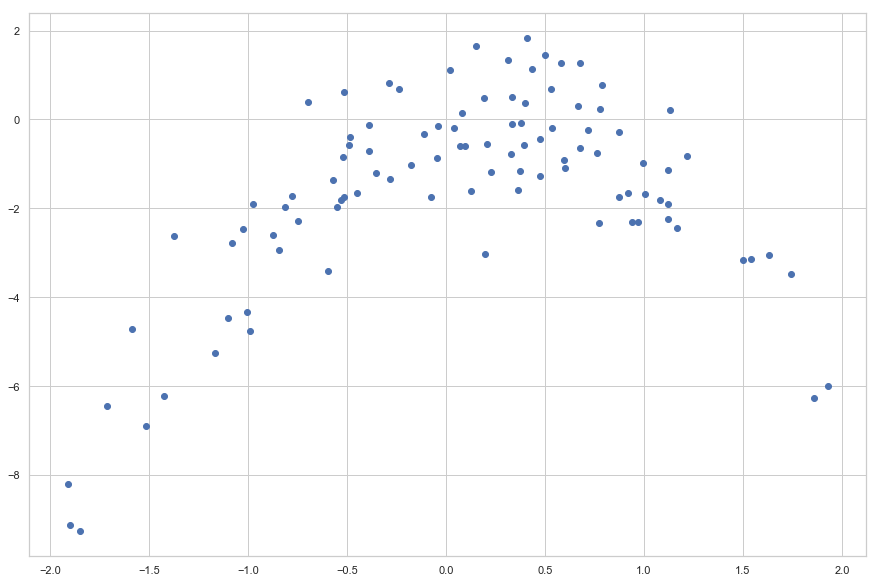

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x,y)

As you'd expect, most of the points occur around x=0 (as we are drawing from a normal distribution with mean 0 and standard deviation 1). The plot is indeed x(1-2x), a quadratic passing through 0 with negative curvature.

### (c) Set a seed, then compute the LOOCV errors that result from fitting the following four models:

1) $ Y = \beta_0 + \beta_1X + \epsilon$

2) $ Y = \beta_0 + \beta_1X + \beta_2X^2 +  \epsilon$

3) $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

4) $ Y = \beta_0 + \beta_1X + \beta_2X^2 +  \beta_3X^3 + \beta_4X^4 + \epsilon$

In [6]:
df = pd.DataFrame(data=[x, y]).T
df.columns = ["x", "y"]


In [7]:
def leaveOneOut(index, *arrays):
    """
    Given array1, array2, etc, (which should be DataFrames)
    return the row at specified index, and the remainder, for each array
    """
    objects = []
    for array in arrays:
        row = array.iloc[index]
        objects.append(row)
        remainder = array.drop(index)
        objects.append(remainder)
    return objects


In [8]:
square_errors = []

np.random.seed(10)
for i in range(len(df)):
    row, remainder = leaveOneOut(i, df)

    x_test = row.x
    x_train = remainder.x
    y_test = row.y
    y_train = remainder.y

    model = smf.ols('y ~ x ', data=remainder)
    results = model.fit()
    y_pred =  results.predict(exog=dict(x=x_test))
    square_error = np.square(y_pred - y_test)
    square_error = square_error[0]  # Take the first element, as we're only predicting one point
    square_errors.append(square_error)
print(f"Linear model error: {np.mean(square_errors):.2f}")

Linear model error: 4.57


In [9]:
square_errors = []

np.random.seed(10)
for i in range(len(df)):
    row, remainder = leaveOneOut(i, df)

    x_test = row.x
    x_train = remainder.x
    y_test = row.y
    y_train = remainder.y

    model = smf.ols('y ~ x + np.square(x)', data=remainder)
    results = model.fit()
    y_pred =  results.predict(exog=dict(x=x_test))
    square_error = np.square(y_pred - y_test)
    square_error = square_error[0]  # Take the first element, as we're only predicting one point
    square_errors.append(square_error)
print(f"Square model error: {np.mean(square_errors):.2f}")

Square model error: 1.13


In [10]:
square_errors = []

np.random.seed(10)
for i in range(len(df)):
    row, remainder = leaveOneOut(i, df)

    x_test = row.x
    x_train = remainder.x
    y_test = row.y
    y_train = remainder.y

    model = smf.ols('y ~ x + np.square(x) + np.power(x,3)', data=remainder)
    results = model.fit()
    y_pred =  results.predict(exog=dict(x=x_test))
    square_error = np.square(y_pred - y_test)
    square_error = square_error[0]  # Take the first element, as we're only predicting one point
    square_errors.append(square_error)
print(f"Cubic model error: {np.mean(square_errors):.2f}")

Cubic model error: 1.14


In [11]:
square_errors = []

np.random.seed(10)
for i in range(len(df)):
    row, remainder = leaveOneOut(i, df)

    x_test = row.x
    x_train = remainder.x
    y_test = row.y
    y_train = remainder.y

    model = smf.ols('y ~ x + np.square(x) + np.power(x,3) + np.power(x,4)',
                    data=remainder)
    results = model.fit()
    y_pred =  results.predict(exog=dict(x=x_test))
    square_error = np.square(y_pred - y_test)
    square_error = square_error[0]  # Take the first element, as we're only predicting one point
    square_errors.append(square_error)
print(f"Quartic model error: {np.mean(square_errors):.2f}")

Quartic model error: 1.16


We can check all the above using the formula:

$$ CV = \frac{1}{n} \sum_{i=1}^{n}{\left( \frac{y_i-\hat{y}_i}{1-h_i}  \right)^2} $$

Where $h_i$ is the leverage.

In [12]:
n = len(df)
leverage = 1/n + np.square(df.x - np.mean(df.x))/np.sum(np.square(df.x - np.mean(df.x)))
df['leverage'] = leverage


In [13]:
summaries = []
model = smf.ols('y ~ x ', data=df)
results = model.fit()
summaries.append(results.summary())
y_pred =  results.predict(df.x)
err = 1/n * np.sum( np.square( (df.y - y_pred)/(1-df.leverage) ) )
print(f"Linear model error (analytic): {err:.2f}")



model = smf.ols('y ~ x + np.square(x)', data=df)
results = model.fit()
y_pred =  results.predict(df.x)
summaries.append(results.summary())

infl = results.get_influence()
leverage = infl.hat_matrix_diag
err = 1/n * np.sum( np.square( (df.y - y_pred)/(1-leverage) ) )
print(f"Quadratic model error (analytic): {err:.2f}")

model = smf.ols('y ~ x + np.square(x) + np.power(x,3)', data=df)
results = model.fit()
y_pred =  results.predict(df.x)
summaries.append(results.summary())

infl = results.get_influence()
leverage = infl.hat_matrix_diag
err = 1/n * np.sum( np.square( (df.y - y_pred)/(1-leverage) ) )
print(f"Cubic model error (analytic): {err:.2f}")

model = smf.ols('y ~ x + np.square(x) + np.power(x,3) + np.power(x,4)', data=df)
results = model.fit()
y_pred =  results.predict(df.x)
summaries.append(results.summary())

infl = results.get_influence()
leverage = infl.hat_matrix_diag
err = 1/n * np.sum( np.square( (df.y - y_pred)/(1-leverage) ) )
print(f"Quartic model error (analytic): {err:.2f}")

Linear model error (analytic): 4.57
Quadratic model error (analytic): 1.13
Cubic model error (analytic): 1.14
Quartic model error (analytic): 1.16


Note I don't know how to compute the leverage for the polynomial cases, so I pulled these obscure methods from the statsmodels source code.

### (e) Which of the models has the smallest LOOCV error? 

The quadratic model has the smallest error, as expected since y is generated as a quadratic function of x

### (f) Do the statistical significances of the coefficients in each model agree with the above conclusions?

In [14]:
print(summaries)

[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     19.28
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.85e-05
Time:                        16:48:20   Log-Likelihood:                -214.23
No. Observations:                 100   AIC:                             432.5
Df Residuals:                      98   BIC:                             437.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

We see from the above that the cubic and above terms are not statistically significant, so there is agreement between the cross-validation results and the p-values.